In [1]:
!python --version

Python 3.13.6


In [40]:
import os
import json
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import torch

In [31]:
images = np.array(sorted([int(_.replace(".jpg", '')) for _ in \
                          os.listdir(r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017") if _.endswith(".jpg")]))

In [32]:
images

array([   285,   1000,   7088,   8899,  11760,  12639,  15272,  17115,
        23034,  24243,  25593,  29187,  30213,  31322,  35963,  44260,
        45070,  46804,  50896,  52007,  54593,  56127,  60823,  60835,
        64495,  68093,  79034,  79144,  80666,  85823, 103548, 104119,
       104455, 104603, 106881, 113354, 115118, 117492, 127517, 134034,
       140420, 142620, 143931, 152465, 155571, 158548, 158945, 163682,
       164115, 166165, 174004, 175438, 176701, 177065, 177934, 178469,
       181969, 188296, 188439, 190307, 191580, 192607, 197022, 198510,
       206994, 209613, 219578, 222235, 223738, 229997, 233370, 233567,
       234526, 235064, 235836, 239274, 242678, 249219, 249643, 256192,
       256195, 259625, 259690, 262487, 263425, 265108, 267434, 270677,
       274460, 275058, 277005, 282037, 289659, 291551, 291664, 291791,
       292330, 293300, 296969, 300155, 304404, 308430, 308631, 312586,
       319369, 322844, 330818, 331799, 337498, 338428, 341921, 343315,
      

In [10]:
with open(file=r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\instances_val2017.json", mode="r") as fp:
    coco_2017_annotations = json.loads(fp.read())

In [12]:
coco_2017_annotations.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [22]:
image_ids = np.array([int(_.get("file_name", "0").replace(".jpg", '')) for _ in coco_2017_annotations.get("images")])
image_ids.sort()

In [23]:
image_ids

array([   139,    285,    632, ..., 581482, 581615, 581781], shape=(5000,))

In [33]:
# images to which we have annotations

np.intersect1d(images, image_ids)

array([   285,   1000,   7088,   8899,  11760,  12639,  15272,  17115,
        23034,  24243,  25593,  29187,  30213,  31322,  35963,  44260,
        45070,  46804,  50896,  52007,  54593,  56127,  60823,  60835,
        64495,  68093,  79034,  79144,  80666,  85823, 103548, 104119,
       104455, 104603, 106881, 113354, 115118, 117492, 127517, 134034,
       140420, 142620, 143931, 152465, 155571, 158548, 158945, 163682,
       164115, 166165, 174004, 175438, 176701, 177065, 177934, 178469,
       181969, 188296, 188439, 190307, 191580, 192607, 197022, 198510,
       206994, 209613, 219578, 222235, 223738, 229997, 233370, 233567,
       234526, 235064, 235836, 239274, 242678, 249219, 249643, 256192,
       256195, 259625, 259690, 262487, 263425, 265108, 267434, 270677,
       274460, 275058, 277005, 282037, 289659, 291551, 291664, 291791,
       292330, 293300, 296969, 300155, 304404, 308430, 308631, 312586,
       319369, 322844, 330818, 331799, 337498, 338428, 341921, 343315,
      

In [46]:
# keep only the records for which we have images
annotations = np.array([_ for _ in coco_2017_annotations.get("annotations") if (_.get("image_id") in images)])

In [47]:
len(annotations)

1199

In [50]:
with open(file=r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\000000011760.jpg", mode="rb") as fp:
    zebras = np.array(Image.open(fp))
zebra_annotations = [_ for _ in annotations if _.get("image_id") == 11760]

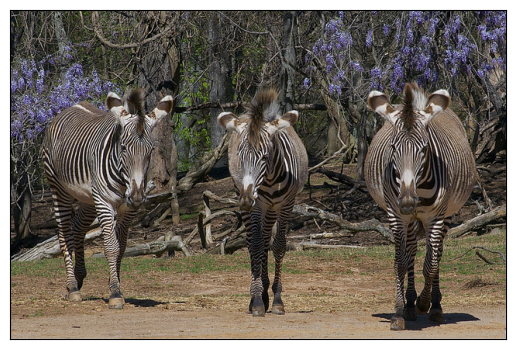

In [57]:
fig, axes = plt.subplots()
axes.imshow(zebras)
axes.set_xticks([])
axes.set_yticks([])
plt.show()

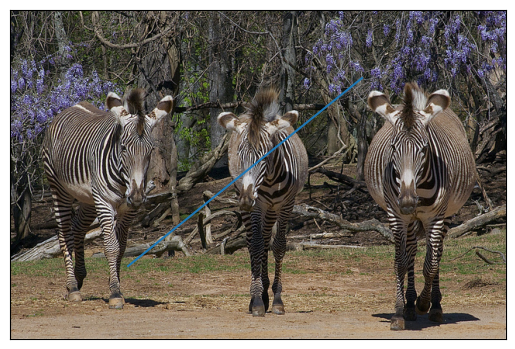

In [60]:
fig, axes = plt.subplots()
axes.imshow(zebras)
axes.set_xticks([])
axes.set_yticks([])

axes.plot([453.65, 151.86], [87.87, 330.44])


plt.show()

In [56]:
zebra_annotations

[{'segmentation': [[525.28,
    87.87,
    538.65,
    106.97,
    566.35,
    99.33,
    571.12,
    125.11,
    583.54,
    146.12,
    605.51,
    198.65,
    603.6,
    229.21,
    566.35,
    274.1,
    560.62,
    323.76,
    557.75,
    355.28,
    562.53,
    396.35,
    547.25,
    409.72,
    540.56,
    396.35,
    528.15,
    386.8,
    524.33,
    400.17,
    496.63,
    418.31,
    486.12,
    407.81,
    491.85,
    386.8,
    496.63,
    343.82,
    489.94,
    325.67,
    493.76,
    297.98,
    483.26,
    264.55,
    456.52,
    233.99,
    453.65,
    189.1,
    475.62,
    149.94,
    482.3,
    147.08,
    458.43,
    127.02,
    459.38,
    108.88,
    475.62,
    97.42,
    490.9,
    113.65,
    498.54,
    117.47,
    507.13,
    102.19,
    510.96,
    91.69]],
  'area': 30324.790750000004,
  'iscrowd': 0,
  'image_id': 11760,
  'bbox': [453.65, 87.87, 151.86, 330.44],
  'category_id': 24,
  'id': 589666},
 {'segmentation': [[268.9,
    136.0,
    279.88,
   